In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re
from matplotlib import pyplot as plt

In [5]:
train = pd.read_csv('./train.csv', header = 0, dtype={'Age': np.float64})
test = pd.read_csv('./test.csv', header = 0, dtype={'Age': np.float64})
full_data = [train, test]

In [6]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 获救情况

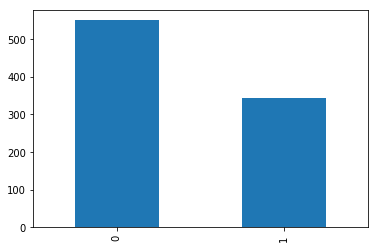

In [8]:
train.Survived.value_counts().plot(kind = 'bar')

- 乘客等级分布

Text(0.5, 1.0, '$Cabin\\ level$')

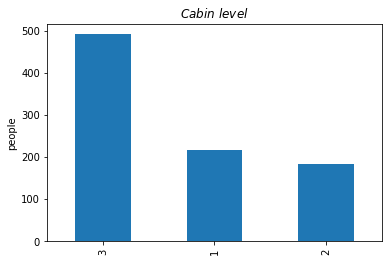

In [9]:
train.Pclass.value_counts().plot(kind = 'bar')
plt.ylabel(u'people')
plt.title(u'$Cabin\ level$')

Text(0.5, 1.0, 'age-Survied (1:survived)')

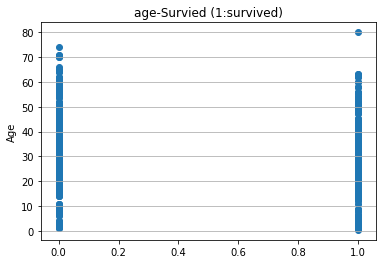

In [10]:
plt.scatter(train.Survived, train.Age)
plt.ylabel(u'Age')
plt.grid(b=True, which='major', axis='y')
plt.title(u'age-Survied (1:survived)')

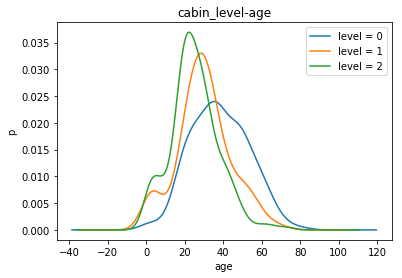

In [11]:
train.Age[train.Pclass == 1].plot(kind = 'kde')
train.Age[train.Pclass == 2].plot(kind = 'kde')
train.Age[train.Pclass == 3].plot(kind = 'kde')
plt.xlabel(u'age')
plt.ylabel(u'p')
plt.title(u'cabin_level-age')
plt.legend((u'level = 0', u'level = 1',u'level = 2'),loc="best" )

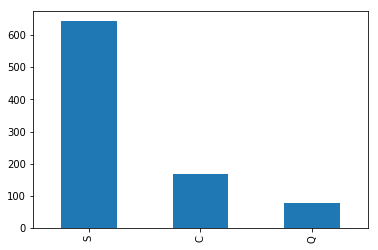

In [12]:
train.Embarked.value_counts().plot(kind='bar')

- 不同等级的乘客获救的情况

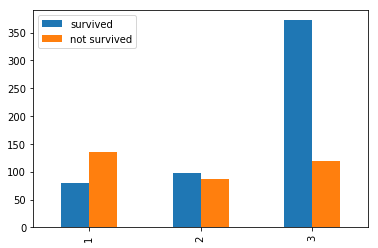

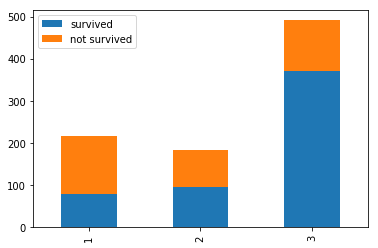

In [13]:
Survived0 = train.Pclass[train.Survived == 0].value_counts() # 没有存活的
Survived1 = train.Pclass[train.Survived == 1].value_counts() # 存活的
df = pd.DataFrame({u'survived': Survived0, u'not survived': Survived1})
df.plot(kind='bar')
df.plot(kind='bar', stacked=True)

- 各个性别获救情况

In [14]:
Survived_m = train.Survived[train.Sex == 'male'].value_counts()

In [15]:
Survived_f = train.Survived[train.Sex == 'female'].value_counts()

In [16]:
df = pd.DataFrame({u'male' : Survived_m, u'female': Survived_f})

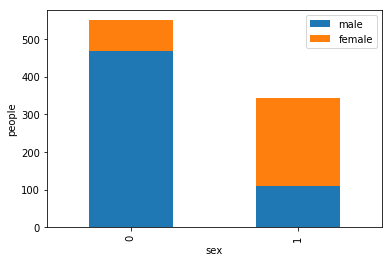

In [17]:
df.plot(kind='bar', stacked=True)
plt.xlabel(u'sex')
plt.ylabel(u'people')
plt.show()

- 各种级别情况下个性别的获救情况

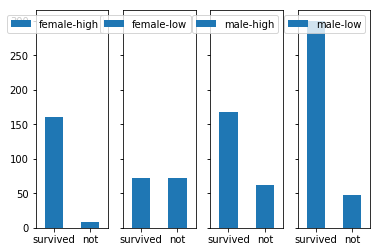

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
train.Survived[train.Sex == 'female'][train.Pclass != 3].value_counts().plot(kind='bar', 
                                                            label=u'female high')
ax1.set_xticklabels([u'survived', u'not'], rotation=0)
plt.legend([u'female-high'], loc='best')


ax2 = fig.add_subplot(1, 4, 2, sharey=ax1)
train.Survived[train.Sex == 'female'][train.Pclass == 3].value_counts().plot(kind='bar', 
                                                                             label=u'female-low')
ax2.set_xticklabels([u'survived', u'not'], rotation=0)
plt.legend([u'female-low'], loc='best')


ax3 = fig.add_subplot(1, 4, 3, sharey=ax1)
train.Survived[train.Sex == 'male'][train.Pclass != 3].value_counts().plot(kind='bar', 
                                                            label=u'male, high')
ax3.set_xticklabels([u'survived', u'not'], rotation=0)
plt.legend([u'male-high'], loc='best')


ax4 = fig.add_subplot(1, 4, 4, sharey=ax1)
train.Survived[train.Sex == 'male'][train.Pclass == 3].value_counts().plot(kind='bar', 
                                                            label=u'male, low')
ax4.set_xticklabels([u'survived', u'not'], rotation=0)
plt.legend([u'male-low'], loc='best')

plt.show()

* PassengerId => 乘客 ID
* Pclass => 乘客等级(1/2/3 等舱位)
* Name => 乘客姓名
* Sex => 性别
* Age => 年龄 
* SibSp => 堂兄弟/妹个数
* Parch => 父母与小孩个数
* Ticket => 船票信息
* Fare => 票价
* Cabin => 客舱
* Embarked => 登船港口
* Survived => 是否获救 => label

# 特征工程
## 以下是计算家庭的大小

In [20]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [21]:
print(train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


## IsAlone

In [22]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[train['FamilySize'] == 1, 'IsAlone'] = 1
print(train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


## Embarked

In [23]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print(train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


## Fare

In [24]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median()) # 为何使用median
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
print(train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


## Age

In [25]:
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg+age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
train['CategoricalAge'] = pd.cut(train['Age'], 5)
print(train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.521368
1   (16.0, 32.0]  0.365517
2   (32.0, 48.0]  0.351351
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null object
Age                891 non-null int32
SibSp              891 non-null int64
Parch              891 non-null int64
Ticket             891 non-null object
Fare               891 non-null float64
Cabin              204 non-null object
Embarked           891 non-null object
FamilySize         891 non-null int64
IsAlone            891 non-null int64
CategoricalFare    891 non-null category
CategoricalAge     891 non-null category
dtypes: category(2), float64(1), int32(1), int64(7), object(5)
memory usage: 95.9+ KB


## Name

In [28]:
def get_title(name):
    title_search = re.search(' ([A-Za-z+]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(train['Title'], train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [29]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
                                            'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
                                           'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print(train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [30]:
# Sex mapping
for dataset in full_data:
    dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male':1})

In [31]:
# Title mapping
for dataset in full_data:
    title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [32]:
# Embarked mapping
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C': 1, 'Q': 2})

In [33]:
# Fare mapping
for dataset in full_data:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [34]:
# Age mapping
for dataset in full_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Fare'] > 64, 'Age'] = 4

In [35]:
# 特征选择
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'FamilySize']
train = train.drop(drop_elements, axis=1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)
test = test.drop(drop_elements, axis = 1)

In [36]:
print(train.head(10))

   Survived  Pclass  Sex  Age  Fare  Embarked  IsAlone  Title
0         0       3    1    1     0         0        0      1
1         1       1    0    2     3         1        0      3
2         1       3    0    1     1         0        1      2
3         1       1    0    2     3         0        0      3
4         0       3    1    2     1         0        1      1
5         0       3    1    0     1         2        1      1
6         0       1    1    3     3         0        1      1
7         0       3    1    0     2         0        0      4
8         1       3    0    1     1         0        0      3
9         1       2    0    0     2         1        0      3


In [37]:
train = train.values

In [38]:
test = test.values

# 分类模型训练

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

c:\users\administrator\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\administrator\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [58]:
# 分类器
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    XGBClassifier()
]

log_cols = ['Classifier', 'Accuracy']
log = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train[0::, 1::]
y = train[0::, 0]

acc_dict = {}

In [59]:
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamm

In [60]:
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

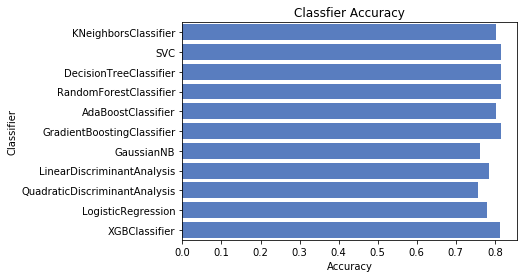

In [61]:
plt.title('Classfier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [63]:
candidate_classifier = SVC()
candidate_classifier.fit(train[0::, 1::], train[0::, 0])
result = candidate_classifier.predict(test)
print(result)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## 模型融合
查看特征相关性

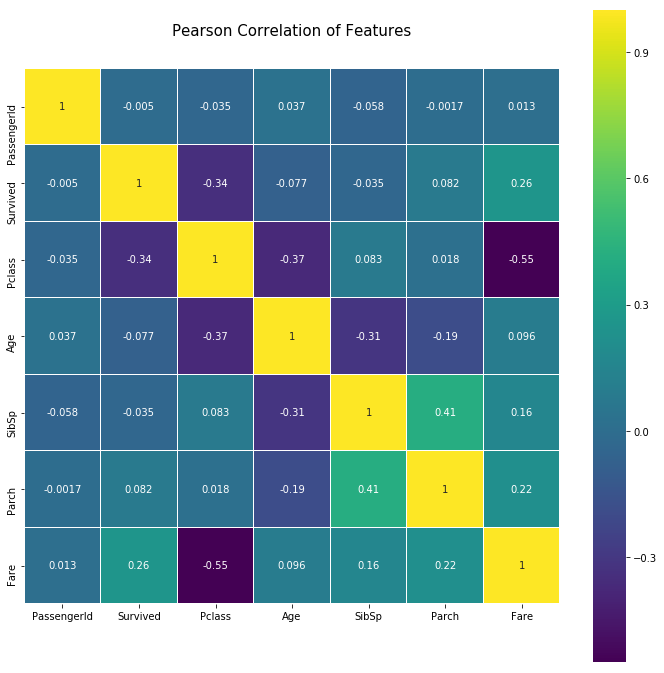

In [41]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
train_temp = pd.read_csv('./titanic/train.csv', header = 0, dtype={'Age': np.float64})
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_temp.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap
           , linecolor='white', annot=True)

In [42]:
test_temp = pd.read_csv('./titanic/test.csv', header = 0, dtype={'Age': np.float64})

In [43]:
print(test_temp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [44]:
len(result)

418

In [45]:
result_temp = pd.DataFrame(data=result, columns=['Survived'])

In [46]:
result_temp['PassengerId'] = test_temp['PassengerId']

In [47]:
order =['PassengerId', 'Survived']
result_temp = result_temp[order]

In [48]:
result_temp.to_csv('./titanic/result.csv', index=False)